<a href="https://colab.research.google.com/github/bmurmann/Book-on-MOS-stages/blob/main/ngspice/Figure_2_7_CS_DC_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DC sweep of common-source amplifier

## Tool setup

In [1]:
# install conda
import os
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

# install ngspice
!conda install -c conda-forge ngspice

✨🍰✨ Everything looks OK!
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



# Simulation

In [2]:
%%writefile netlist.spice
* Common-source amplifier

v1 vdd 0 5
v2 vi 0  1
m1 vo vi 0 0 my_nmos w=20u l=1u
rd vdd vo 5k

.model my_nmos nmos level=1 vto=0.5 50u
.option brief
.op
.end

.control
save all
dc v2 0 5 0.01
display
wrdata output.txt v(vo)
.endc


Overwriting netlist.spice


In [3]:
%%writefile .spiceinit
set ngbehavior=hsa
set ng_nomodcheck

Overwriting .spiceinit


In [4]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs a


Circuit: * common-source amplifier

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 501
Here are the vectors currently active:

Title: * common-source amplifier
Name: dc1 (DC transfer characteristic)
Date: Wed Nov  8 22:25:14  2023

    v-sweep             : voltage, real, 501 long [default scale]
    v1#branch           : current, real, 501 long
    v2#branch           : current, real, 501 long
    vdd                 : voltage, real, 501 long
    vi                  : voltage, real, 501 long
    vo                  : voltage, real, 501 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vo                               4.750000e+00
	vi                               1.000000e+00
	vdd                              5.000000e+00

	Source	Current
	------	-------

	v1#branch      

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vi", "vo"]
df

,vi,vo
0,0.00,5.000000
1,0.01,5.000000
2,0.02,5.000000
3,0.03,5.000000
4,0.04,5.000000
...,...,...
496,4.96,0.532631
497,4.97,0.531430
498,4.98,0.530236
499,4.99,0.529047


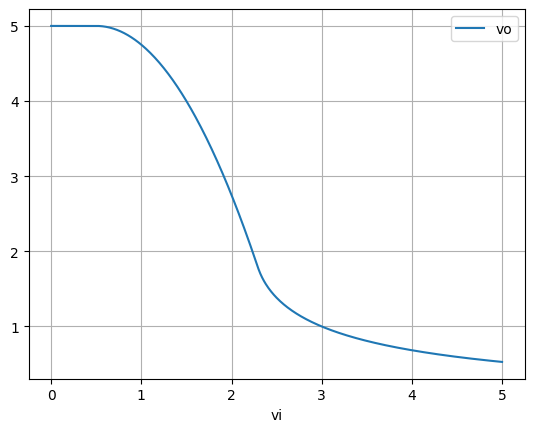

In [6]:
df.plot(x="vi", y="vo", grid=True)
plt.show()